## Mini Project III

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [3]:
## Check sklearn version --> This version might not have .set_output
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.0.2.


## Demographics

### EDA

In [ ]:
df_customer = pd.read_csv("Data/twm_customer.csv", ";")
df = df_customer

In [38]:
df

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,F,4,,Lillian ...,Kaufman ...,9677,B ...,90016,Los Angeles,CA
743,1362895,26387,56,6,1,M,2,,Marty ...,McSherry ...,3227,Inspiration ...,10126,New York City,NY
744,1362569,61300,50,0,2,M,2,,Ken ...,Lawrence ...,6082,23rd ...,87194,Albuquerque,NM
745,1363364,15100,37,7,0,F,2,,Debbie ...,Runner ...,7851,H ...,35241,Birmingham,AL


In [39]:
## Feature Engineer region
df['region'] = df['state_code']

In [40]:
## regions = {1: 'Northeast', 2: 'South', 3: 'Midwest', 4: 'Southwest', 5: 'West'}

In [41]:
df['region'] = df['region'].replace({"AL  ":1, "AZ  ":2, "CA  ":5, "CO  ":5, "DC  ":2, "FL  ":2, "GA  ":2, "HI  ":5,
                 "IL  ":3, "IN  ":3, "KS  ":3, "KY  ":2, "LA  ":2, "MA  ":1, "MD  ":1, "MI  ":3,
                 "MN  ":3, "MO  ":3, "NB  ":3, "NC  ":2, "NJ  ":1, "NM  ":4, "NV  ":5, "NY  ":1,
                 "OH  ":5, "OK  ":4, "OR  ":5, "PA  ":1, "TN  ":2, "TX  ":4, "VA  ":2, "WA  ":5, "WI  ":3})

In [42]:
df.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code,region
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV,5
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA,5
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA,5
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA,5
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY,1


In [43]:
## drop columns we don't want to keep for ML
df_demo = df[['cust_id','income', 'age', 'years_with_bank', 'nbr_children', 'gender', 'marital_status', 'name_prefix', 'region']]

In [44]:
df_demo = df_demo.drop(columns =['cust_id', 'name_prefix'])

In [45]:
df_demo

,income,age,years_with_bank,nbr_children,gender,marital_status,region
0,26150,46,5,1,M,2,5
1,6605,71,1,0,M,2,5
2,18548,38,8,0,F,1,5
3,47668,54,3,0,F,1,5
4,44554,59,9,2,F,4,1
...,...,...,...,...,...,...,...
742,14795,36,6,1,F,4,5
743,26387,56,6,1,M,2,1
744,61300,50,0,2,M,2,4
745,15100,37,7,0,F,2,1


In [46]:
## Convert categorical data to numerical --> In this case all our categorical data is nominal (no order or rank) so we use dummies.
## If we had ordinal data (ordered/ranked) we could just assign them values instead
cat_features = ['gender', 'marital_status', 'region']
cont_features = ['years_with_bank', 'nbr_children', 'age', 'income']
## One Hot Encode categorical features
df_model = pd.get_dummies(df_demo, columns=cat_features)

In [47]:
df_model.head()

,income,age,years_with_bank,nbr_children,gender_F,gender_M,marital_status_1,marital_status_2,marital_status_3,marital_status_4,region_1,region_2,region_3,region_4,region_5
0,26150,46,5,1,0,1,0,1,0,0,0,0,0,0,1
1,6605,71,1,0,0,1,0,1,0,0,0,0,0,0,1
2,18548,38,8,0,1,0,1,0,0,0,0,0,0,0,1
3,47668,54,3,0,1,0,1,0,0,0,0,0,0,0,1
4,44554,59,9,2,1,0,0,0,0,1,1,0,0,0,0


## Note for now I've tried min max and standard scaler, for the future is there a way to measure which scaling method is better?

### For this project I didnt want to give the categorical data too much weight so I scaled the numerical data only with standard scaler, this way everything wont just be clustered by the categorical data

Note for the following, if i want the data to remain as a df after scaling (usually it converts to numpy array), just list = df.columns.values.tolist(), then do as i did below df[list] = scaler.fit_transform(df[list])
* that should work i think
* Another method is scaler = StandardScaler().set_output(transform="pandas") but that needs an updated version of sklearn i think, not sure why i cant update mine, need to ask
* Or we could also pd.DataFrame(), the resulting df would be missing column names but we can remedy that by df_model.columns = df.columns


In [48]:
## Scale Cont Features
scaler = StandardScaler()
df_model[cont_features] = scaler.fit_transform(df_model[cont_features])
## df_model = scaler.fit_transform(df)
df_model

,income,age,years_with_bank,nbr_children,gender_F,gender_M,marital_status_1,marital_status_2,marital_status_3,marital_status_4,region_1,region_2,region_3,region_4,region_5
0,0.154185,0.184312,0.408539,0.258591,0,1,0,1,0,0,0,0,0,0,1
1,-0.726524,1.493070,-1.087435,-0.648298,0,1,0,1,0,0,0,0,0,0,1
2,-0.188366,-0.234490,1.530520,-0.648298,1,0,1,0,0,0,0,0,0,0,1
3,1.123798,0.603115,-0.339448,-0.648298,1,0,1,0,0,0,0,0,0,0,1
4,0.983479,0.864867,1.904514,1.165479,1,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,-0.357478,-0.339191,0.782533,0.258591,1,0,0,0,0,1,0,0,0,0,1
743,0.164864,0.707816,0.782533,0.258591,0,1,0,1,0,0,1,0,0,0,0
744,1.738064,0.393714,-1.461429,1.165479,0,1,0,1,0,0,0,0,0,1,0
745,-0.343735,-0.286841,1.156526,-0.648298,1,0,0,1,0,0,1,0,0,0,0


In [49]:
## Ready to plug into model


In [50]:
## Find Optimal K
## Elbow
inertias = []
K = range(2,11) #run K-means with K ranging from 2 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_model)
    inertias.append(kmeanModel.inertia_)

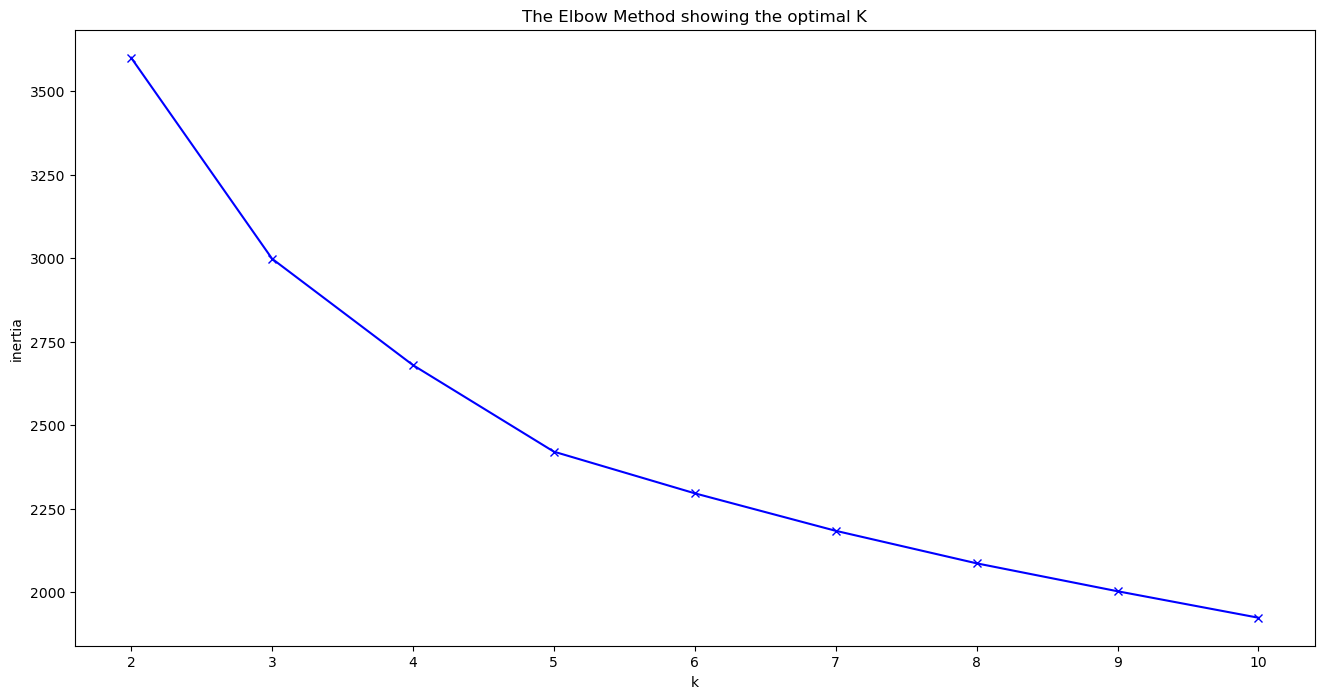

In [51]:
# plot elbow method
plt.figure(figsize=(16,8))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('The Elbow Method showing the optimal K')
plt.show()

In [52]:
## 
from sklearn.metrics import silhouette_score

silhouettes = []
K = range(2,10) #run K-means with K ranging from 2 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_model)
    label=kmeanModel.predict(df_model)
    silhouettes.append(silhouette_score(df_model,label))

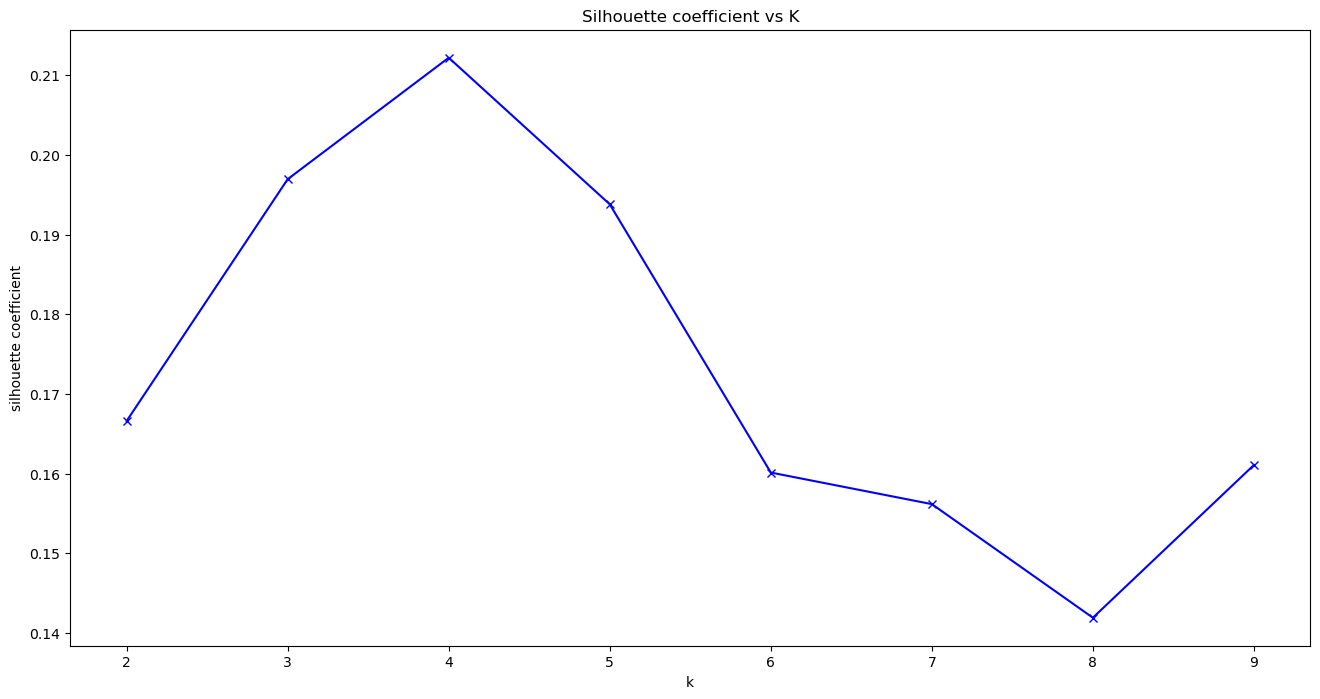

In [53]:
# plot silhouette
plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.title('Silhouette coefficient vs K')
plt.show()

#### Lets say 5 cluster

In [54]:
model = KMeans(5)
model.fit(df_model) 
y_pred = model.predict(df_model)
## Store labels
k_labels = model.labels_

In [55]:
## Create a new column in the original dataframe to store the cluster labels
df_demo['Cluster_label'] = k_labels

Alternatively


In [56]:
#Kmeans with 5 clusters
#model = KMeans(5)
#model.fit(df_model)

#create a df with the original data but with the assigned cluster label
#df_with_clusters = df.copy()
#df_with_clusters['label'] = model.predict(df_model)
#df_with_clusters.head()

In [57]:
df_demo.head()

,income,age,years_with_bank,nbr_children,gender,marital_status,region,Cluster_label
0,26150,46,5,1,M,2,5,3
1,6605,71,1,0,M,2,5,4
2,18548,38,8,0,F,1,5,3
3,47668,54,3,0,F,1,5,4
4,44554,59,9,2,F,4,1,3


In [58]:
df_demo['Cluster_label'].value_counts()

1    201
3    162
4    162
0    154
2     68
Name: Cluster_label, dtype: int64

We can see now in the OG dataframe under the 'Cluster_label' column we see which cluster each data point belongs to

## PCA

Text(0, 0.5, '% Cumulative explained variance')

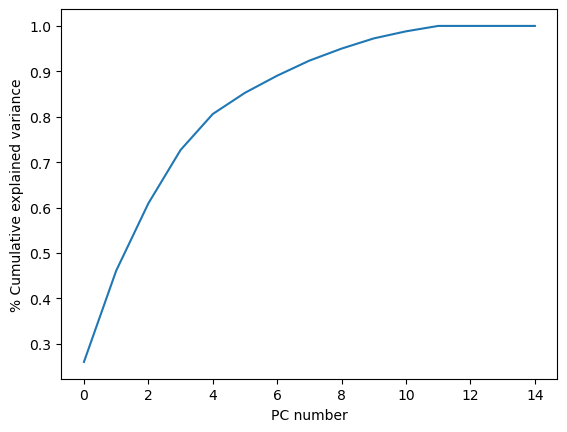

In [59]:
## First lets look at cumulative explained variance
pca = PCA()
pca.fit(df_model)

cum_explained_variance = np.cumsum(pca.explained_variance_ratio_)

## Plot cumulative explained variance against number of PCs
plt.plot(cum_explained_variance)
plt.xlabel('PC number')
plt.ylabel('% Cumulative explained variance')

Looks like we want to keep 6 PCAs, that explains 90% of the variance

### Perform PCA To visualise data in 2D

Just to explain the code below
* If pca = PCA(n_components=2).set_output(transform="pandas") works for me, pca.fit_transform(df_scaled) would automatically convert to a data frame but since it doesnt, its converting it to a numpy array which i have to specifically convert back to a data frame with pd.DataFrame and specify the columns


In [60]:
## Since we want to plot on a scatter plot, we want PCA with 2 components
pca = PCA(n_components=2)
## Output PCA transformation as a pandas dataframe
## df_scaled = pd.DataFrame(df_scaled, columns = df_x.columns) another example
df_pca = pd.DataFrame(pca.fit_transform(df_model), columns = ['PCA1', 'PCA2'])

In [61]:
df_pca

,PCA1,PCA2
0,0.634157,-0.107559
1,0.063230,-0.610417
2,-0.535478,-1.209887
3,0.304953,-0.317472
4,1.943903,-0.623812
...,...,...
742,-0.141832,-0.120971
743,1.004567,-0.620371
744,1.732964,1.684568
745,-0.238465,-1.011416


In [62]:
df_pca_clusters = df_pca.copy()
df_pca_clusters['Cluster_num'] = df_demo['Cluster_label']

In [63]:
df_pca_clusters

,PCA1,PCA2,Cluster_num
0,0.634157,-0.107559,3
1,0.063230,-0.610417,4
2,-0.535478,-1.209887,3
3,0.304953,-0.317472,4
4,1.943903,-0.623812,3
...,...,...,...
742,-0.141832,-0.120971,3
743,1.004567,-0.620371,3
744,1.732964,1.684568,2
745,-0.238465,-1.011416,3


In [ ]:
#to visualize centroids in PCA space, we also need to transform them.
pca_centroids = pca.transform(model.cluster_centers_)
pca_centroids

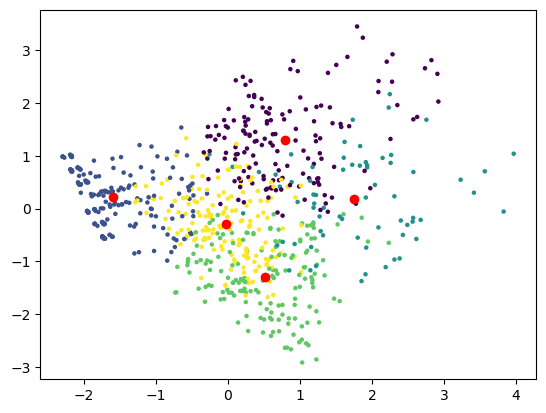

In [65]:
## Now lets plot this
plt.scatter(df_pca_clusters['PCA1'], df_pca_clusters['PCA2'], c=df_pca_clusters['Cluster_num'], s=5)
plt.scatter(pca_centroids[:,0], pca_centroids[:,1], c='red')

<AxesSubplot:xlabel='PCA1', ylabel='PCA2'>

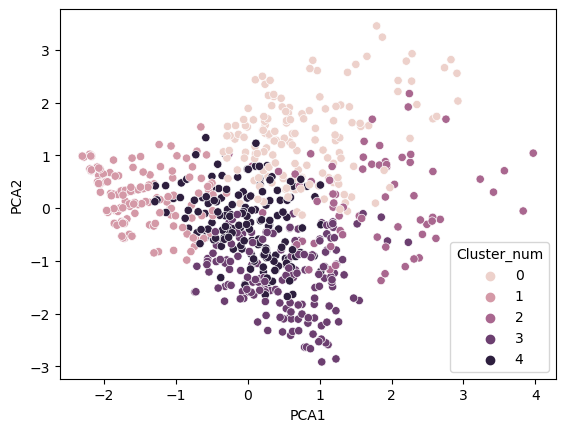

In [66]:
## Alternatively
sns.scatterplot(x="PCA1",y="PCA2",hue="Cluster_num", data=df_pca_clusters)

Hard to intepret, we get these two new variables, but we don't really know what they mean/represent. Lets we can do is look at each of the PCA's components to try and determine what is important to each PCA

In [67]:
df_model['Cluster'] = df_demo['Cluster_label']

In [68]:
## Create new Dataframe for means per cluster
df_means = df_model.copy()
df_means = df_means.groupby('Cluster', as_index = False).mean()

In [69]:
df_means

,Cluster,income,age,years_with_bank,nbr_children,gender_F,gender_M,marital_status_1,marital_status_2,marital_status_3,marital_status_4,region_1,region_2,region_3,region_4,region_5
0,0,0.222168,-0.275283,-0.205879,1.613035,0.590909,0.409091,0.000000,0.655844,0.142857,0.201299,0.188312,0.136364,0.168831,0.142857,0.363636
1,1,-0.750897,-1.193204,-0.192456,-0.585132,0.537313,0.462687,0.885572,0.084577,0.004975,0.024876,0.199005,0.104478,0.174129,0.154229,0.368159
2,2,2.268580,0.406031,0.139044,0.098552,0.294118,0.705882,0.220588,0.558824,0.117647,0.102941,0.205882,0.132353,0.205882,0.235294,0.220588
3,3,-0.075667,0.797328,1.144983,-0.346002,0.604938,0.395062,0.246914,0.617284,0.055556,0.080247,0.259259,0.129630,0.179012,0.098765,0.333333
4,4,-0.156105,0.774384,-0.768848,-0.502748,0.623457,0.376543,0.265432,0.598765,0.049383,0.086420,0.216049,0.148148,0.172840,0.129630,0.333333


#### Just like in lecture, we can see that the categorical data really doesnt play well with Clusters, really messes some things up. We could try to scale the Continuous (numerical) data higher to give them a greater weight to try to fix this. For now I'm just gonna do the radar charts with the continuous data.

Lets try doing radar charts

In [70]:
import plotly.graph_objects as go

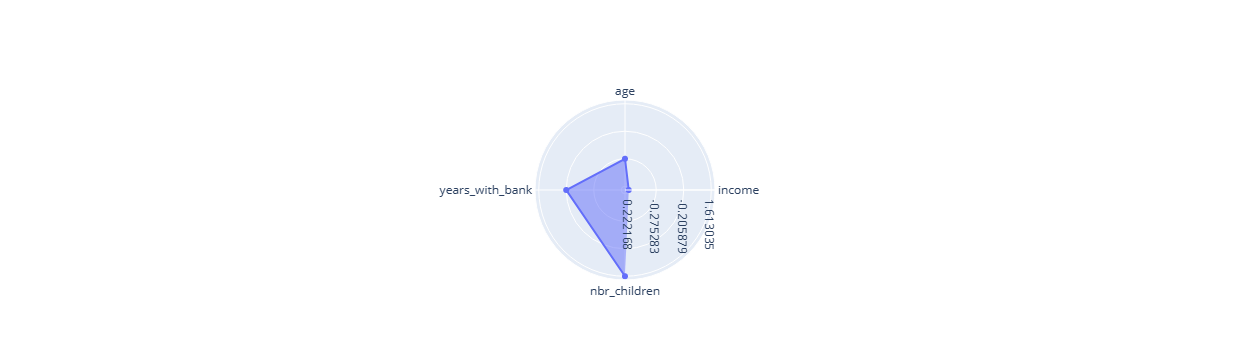

In [91]:
## Test out code for single radar chart Cluster 0

## Define Categories/Feature Names
Categories = ['income', 'age', 'years_with_bank', 'nbr_children']
Weight = ['0.222168','-0.275283','-0.205879','1.613035']


fig = go.Figure(data=go.Scatterpolar(
  r=Weight,
  theta=Categories,
  fill='toself'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
    ),
  ),
  showlegend=False
)

fig.show()

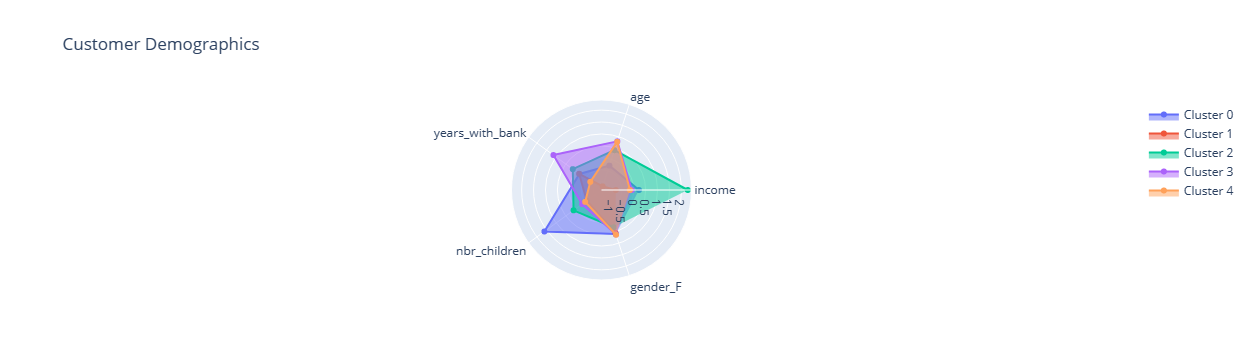

In [89]:
## For all clusters
Categories = ['income', 'age', 'years_with_bank', 'nbr_children', 'gender_F ']
data = []
for i in range(5):
    data.append(go.Scatterpolar(
        r=df_means[Categories].iloc[i].tolist(),
        theta=Categories,
        fill='toself',
        name='Cluster ' + str(i)
    ))
# define the layout
layout = go.Layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            
        )
    ),
    showlegend=True,
    title='Customer Demographics'
)

# display the radar charts
fig = go.Figure(data=data, layout=layout)
fig.show()

In [73]:
df_model[Categories]

,income,age,years_with_bank,nbr_children,gender_F
0,0.154185,0.184312,0.408539,0.258591,0
1,-0.726524,1.493070,-1.087435,-0.648298,0
2,-0.188366,-0.234490,1.530520,-0.648298,1
3,1.123798,0.603115,-0.339448,-0.648298,1
4,0.983479,0.864867,1.904514,1.165479,1
...,...,...,...,...,...
742,-0.357478,-0.339191,0.782533,0.258591,1
743,0.164864,0.707816,0.782533,0.258591,0
744,1.738064,0.393714,-1.461429,1.165479,0
745,-0.343735,-0.286841,1.156526,-0.648298,1


## Try Clustering W/O categorical data?

In [74]:
df_model2 = df_model[Categories]

In [75]:
df_model2

,income,age,years_with_bank,nbr_children,gender_F
0,0.154185,0.184312,0.408539,0.258591,0
1,-0.726524,1.493070,-1.087435,-0.648298,0
2,-0.188366,-0.234490,1.530520,-0.648298,1
3,1.123798,0.603115,-0.339448,-0.648298,1
4,0.983479,0.864867,1.904514,1.165479,1
...,...,...,...,...,...
742,-0.357478,-0.339191,0.782533,0.258591,1
743,0.164864,0.707816,0.782533,0.258591,0
744,1.738064,0.393714,-1.461429,1.165479,0
745,-0.343735,-0.286841,1.156526,-0.648298,1


In [76]:
inertias = []
K = range(2,11) #run K-means with K ranging from 2 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_model2)
    inertias.append(kmeanModel.inertia_)

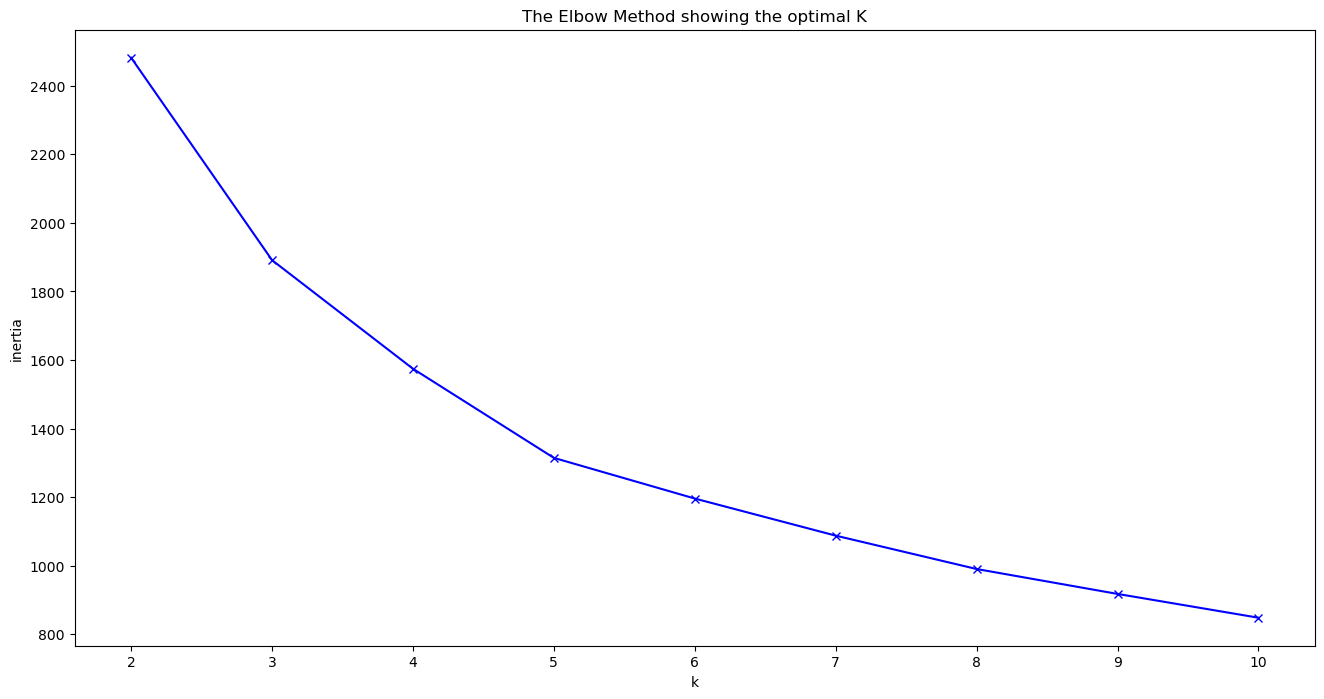

In [77]:
# plot elbow method
plt.figure(figsize=(16,8))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('The Elbow Method showing the optimal K')
plt.show()

In [92]:
model = KMeans(3)
model.fit(df_model2) 
y_pred = model.predict(df_model2)
## Store labels
k_labels = model.labels_


In [ ]:
df_model2['Cluster_label'] = k_labels

In [94]:
df_model2['Cluster_label'].value_counts()

0    261
1    243
2    243
Name: Cluster_label, dtype: int64

In [95]:
## Since we want to plot on a scatter plot, we want PCA with 2 components
pca = PCA(n_components=2)
## Output PCA transformation as a pandas dataframe
df_pca2 = pd.DataFrame(pca.fit_transform(df_model2), columns = ['PCA1', 'PCA2'])

In [96]:
df_pca2['Cluster Labels'] = df_model2['Cluster_label']

In [97]:
df_pca2

,PCA1,PCA2,Cluster Labels
0,0.859347,0.033694,0
1,0.915496,-1.032261,0
2,0.683922,-1.076478,0
3,0.666360,0.113701,1
4,1.604419,0.797398,1
...,...,...,...
742,-0.672904,-0.009476,2
743,1.335070,-0.147547,0
744,0.584236,2.172719,1
745,0.478873,-1.066073,0


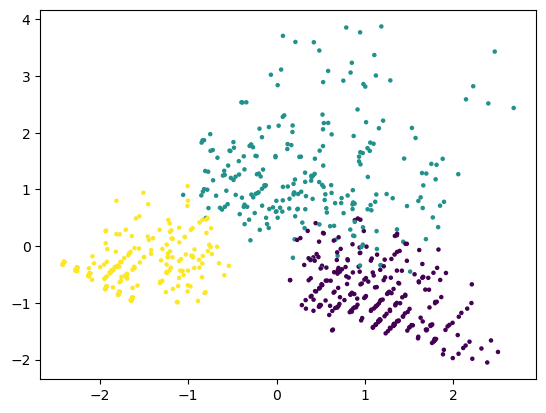

In [98]:
plt.scatter(df_pca2['PCA1'], df_pca2['PCA2'], c=df_pca2['Cluster Labels'], s=5)

In [99]:
df_mean2 = df_model2.groupby('Cluster_label', as_index = False).mean()

In [100]:
df_mean2

,Cluster_label,income,age,years_with_bank,nbr_children,gender_F
0,0,-0.208026,0.990026,0.223692,-0.474564,0.601533
1,1,0.869893,-0.004838,-0.014705,1.038590,0.518519
2,2,-0.646458,-1.058523,-0.225557,-0.528872,0.555556


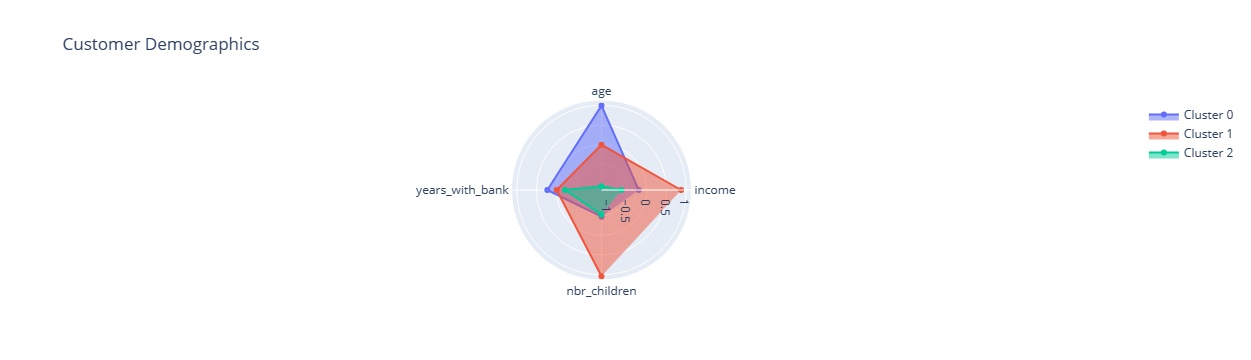

In [101]:
Categories = ['income', 'age', 'years_with_bank', 'nbr_children']
data = []
for i in range(3):
    data.append(go.Scatterpolar(
        r=df_mean2[Categories].iloc[i].tolist(),
        theta=Categories,
        fill='toself',
        name='Cluster ' + str(i)
    ))
# define the layout
layout = go.Layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
        )
    ),
    showlegend=True,
    title='Customer Demographics'
)

# display the radar charts
fig = go.Figure(data=data, layout=layout)
fig.show()